In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2

%matplotlib inline

# **1. Loading and Displaying Image (Numpy and OpenCV Basics):**

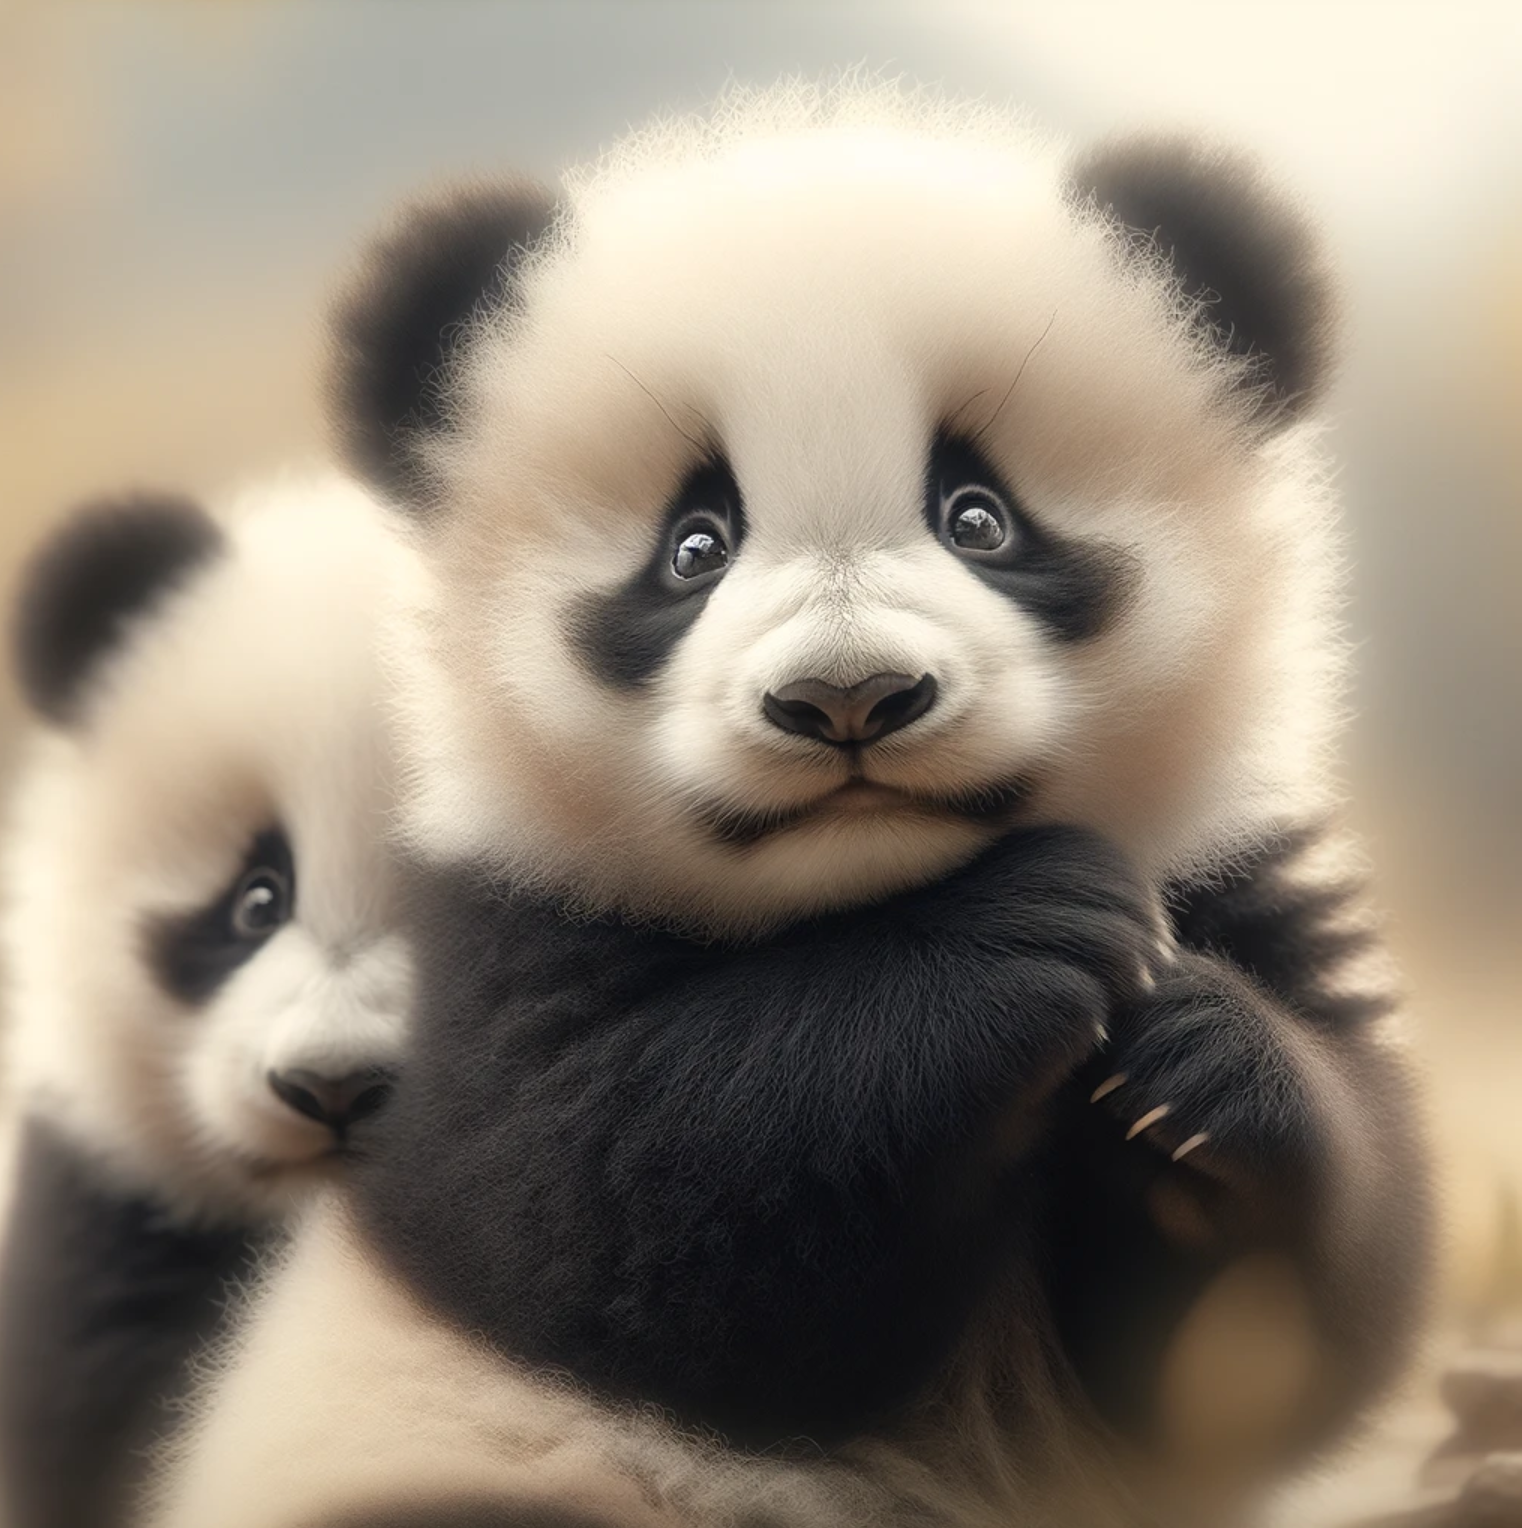

In [2]:
# Displaying Image in Numpy

panda = Image.open('Panda.png')
panda

Size of Image (Width, Height, Color Channel): (1528, 1522, 3)


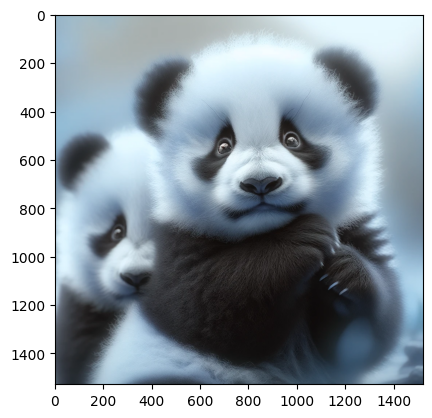

In [3]:
# Displaying Panda.png in OpenCV
panda_cv = cv2.imread('Panda.png')
print('Size of Image (Width, Height, Color Channel):', panda_cv.shape)
plt.imshow(panda_cv)

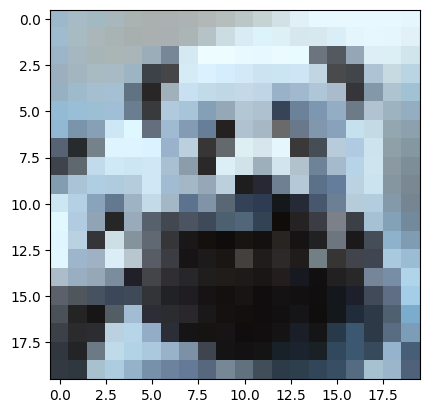

In [4]:
# Suppose we want to modify the pixel values, we can use cv2.resize(image_name, (pixel_width,pixel_height))
pixel_panda = cv2.resize(panda_cv,(20,20))
plt.imshow(pixel_panda)

# **2. Color Space Conversion**

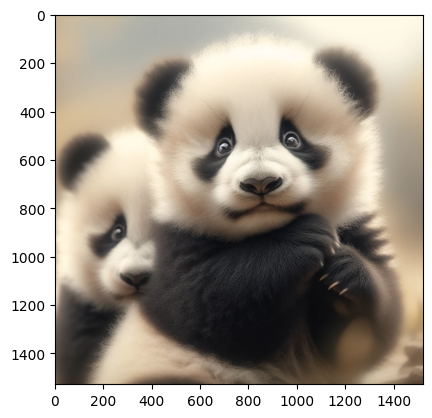

In [5]:
# Since the image only shows the blue channel, let's fix it
fixed_panda=cv2.cvtColor(panda_cv, cv2.COLOR_BGR2RGB)
plt.imshow(fixed_panda)

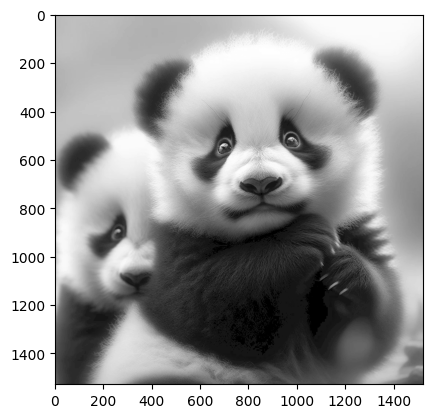

In [6]:
# Converting to grayscale
panda_gray=cv2.imread('Panda.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(panda_gray, cmap= 'gray')

# **3. Image Resizing**

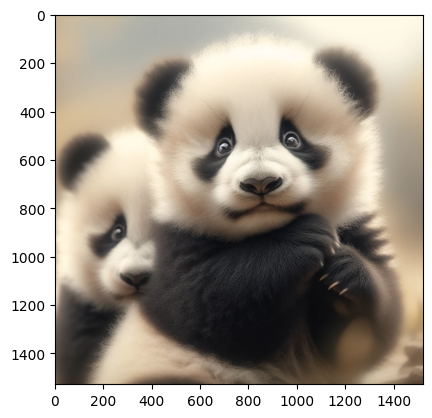

In [7]:
panda_resized=cv2.resize(fixed_panda, (600,600))
plt.imshow(fixed_panda)

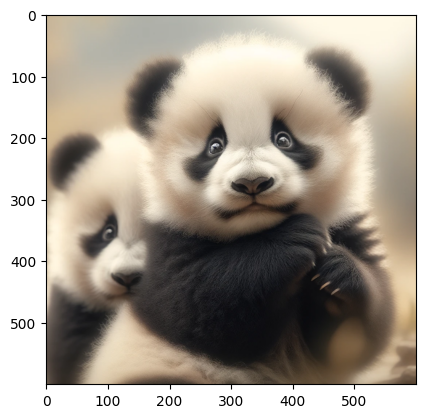

In [8]:
plt.imshow(panda_resized)

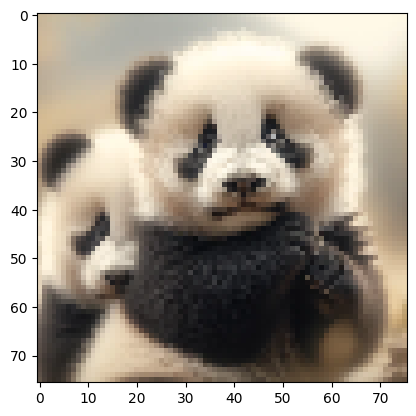

In [9]:
# Resize by Ratios of 0.05
w_ratio = 0.05
l_ratio = 0.05

new_panda = cv2.resize(fixed_panda, (0,0), fixed_panda, w_ratio, l_ratio)
plt.imshow(new_panda)

# **4. Image Thresholding**

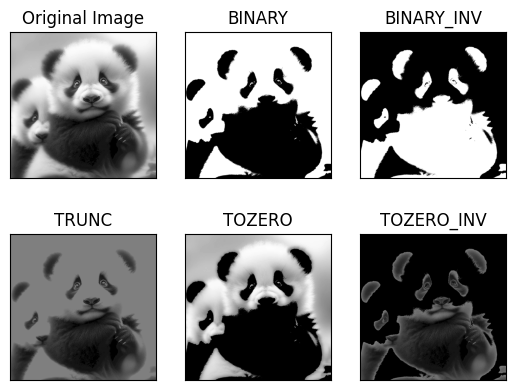

In [10]:
ret,thresh1 = cv2.threshold(panda_gray,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(panda_gray,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(panda_gray,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(panda_gray,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(panda_gray,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [panda_gray, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# **5. Brightness Adjustment**

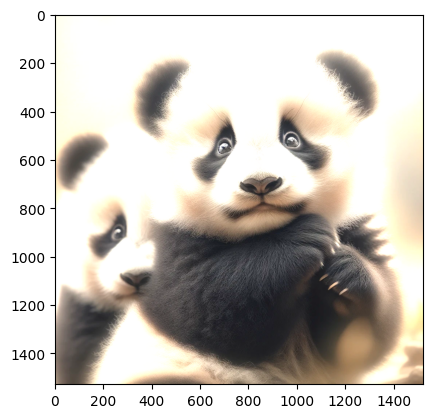

In [11]:
alpha = 1.5
beta = 10

adjusted = cv2.convertScaleAbs(fixed_panda, alpha=alpha,beta=beta)
plt.imshow(adjusted)

# **6. Blurring and Smoothing**

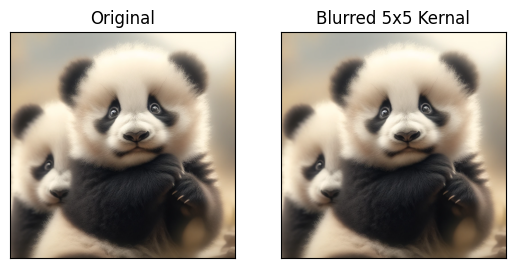

In [12]:
# Original vs Blurred Image
blur = cv2.GaussianBlur(fixed_panda,(5,5),0)
blur11 = cv2.GaussianBlur(fixed_panda,(11,11),0)
blur21 = cv2.GaussianBlur(fixed_panda,(21,21),0)

plt.subplot(121),plt.imshow(fixed_panda),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred 5x5 Kernal')
plt.xticks([]), plt.yticks([])
plt.show()

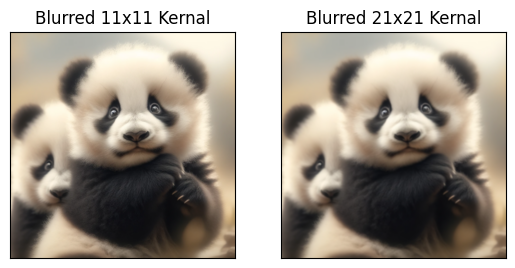

In [13]:
plt.subplot(121),plt.imshow(blur11),plt.title('Blurred 11x11 Kernal')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur21),plt.title('Blurred 21x21 Kernal')
plt.xticks([]), plt.yticks([])
plt.show()

What does Guassian Blurring do: basically smooths out the uneven pixels by taking out the extreme outliers

There is barely any difference between the original, 5x5 and 10x10 kernal size blurring as it looks relatively the same. However, increase it by 2x for the 10x10 kernal into 20x20, and you can already see a drastic change.

# **7. Image Indexing and Cropping**

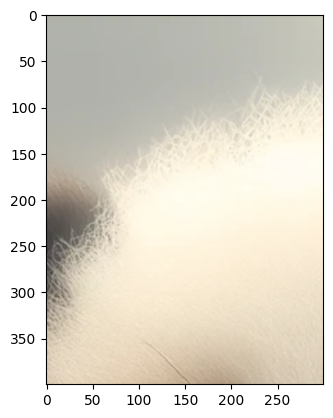

In [14]:
# Image Indexing
p2 = fixed_panda[0:400, 500:800]
plt.imshow(p2)

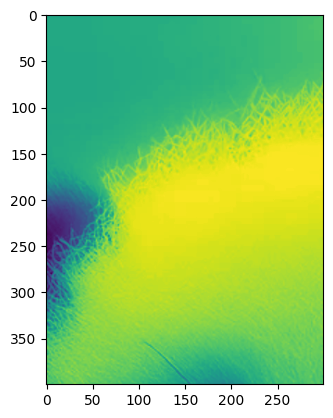

In [20]:
# Changing Colors
xyz = cv2.cvtColor(p2, cv2.COLOR_BGR2GRAY)
plt.imshow(xyz)

# **8. Image Rotation**

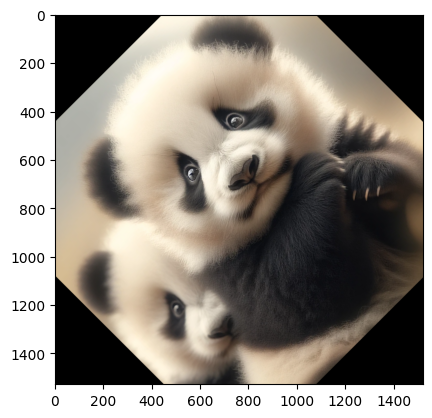

In [15]:
# Grabbing dimensions and calculating center of image
(h, w) = fixed_panda.shape[:2]
(cX, cY) = (w // 2, h // 2)

# Creating the rotation matrix using the height, weight, and central axes by 45 Degrees
rotation_matrix = cv2.getRotationMatrix2D((cX, cY), 45, 1.0)
rotated = cv2.warpAffine(fixed_panda, rotation_matrix, (w, h))
plt.imshow(rotated)

Challenges in rotating an image in OpenCV in Python include the risk of losing information at the edges, potential distortion, interpolation artifacts leading to blurring or aliasing, and performance issues, particularly with large images or when processing multiple images. Solutions to these challenges involve strategies such as padding the image to prevent information loss, cropping to remove unwanted regions post-rotation, selecting appropriate interpolation methods to reduce artifacts, leveraging optimized libraries and algorithms provided by OpenCV for improved performance, and considering angle adjustment to minimize distortion and interpolation issues.

# **9. Image Flipping**

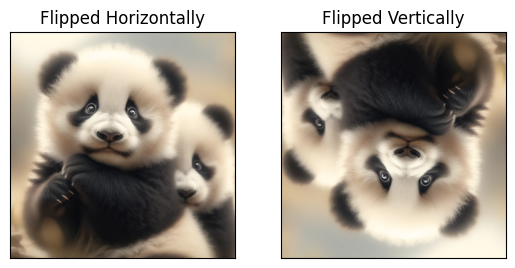

In [16]:
# Flip the image horizontally
flipped_horizontal = cv2.flip(fixed_panda, 1)

# Flip the image vertically
flipped_vertical = cv2.flip(fixed_panda, 0)

# Display the original and flipped images
plt.subplot(121),plt.imshow(flipped_horizontal),plt.title('Flipped Horizontally')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(flipped_vertical),plt.title('Flipped Vertically')
plt.xticks([]), plt.yticks([])
plt.show()

Flipping an image, whether horizontally or vertically, serves as a valuable preprocessing step in computer vision tasks. By augmenting the dataset through flipping, data diversity increases, aiding model generalization and robustness. Furthermore, flipping facilitates symmetry detection, beneficial for tasks like object detection or facial recognition, and promotes orientation invariance, particularly useful in image classification. Additionally, flipping addresses data imbalance by generating synthetic examples of underrepresented classes, and in applications like medical imaging, it aids image registration by providing additional transformation options for alignment. Overall, flipping images is a straightforward yet powerful technique in preprocessing, enhancing model performance across diverse computer vision applications.

# **10. Edge Detection**

In [17]:
# Apply Sobel filter for edge detection
sobel_x = cv2.Sobel(fixed_panda, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(fixed_panda, cv2.CV_64F, 0, 1, ksize=3)
edges = cv2.magnitude(sobel_x, sobel_y)

# Convert edges to uint8 for display
edges = np.uint8(edges)

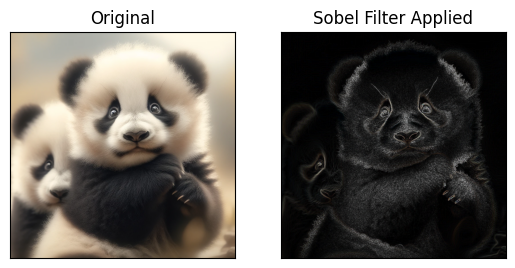

In [18]:
plt.subplot(121),plt.imshow(fixed_panda),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges),plt.title('Sobel Filter Applied')
plt.xticks([]), plt.yticks([])
plt.show()

The Sobel filter is a convolutional operator commonly used in image processing for edge detection. It computes an approximation of the gradient of the image intensity function by convolving the image with a pair of 3x3 convolution kernels—one for detecting horizontal changes and the other for vertical changes. These kernels are designed to approximate the derivative of the image intensity function along the respective axes. Through convolution, the filter emphasizes areas of rapid intensity change, highlighting edges or boundaries within the image. The resulting output provides information about the magnitude and direction of gradients at each pixel, facilitating the identification of edges and other features crucial for subsequent image analysis tasks.

# **11. Gradients in Image**

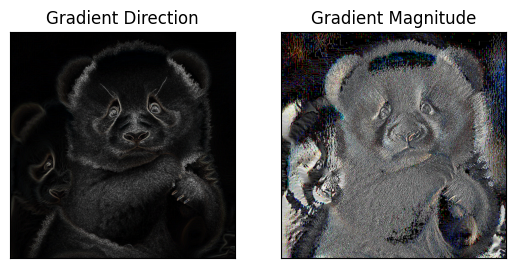

In [19]:
magnitude, direction = cv2.cartToPolar(sobel_x, sobel_y, angleInDegrees=True)

plt.subplot(121),plt.imshow(magnitude.astype(np.uint8)),plt.title('Gradient Direction')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(direction.astype(np.uint8)),plt.title('Gradient Magnitude')
plt.xticks([]), plt.yticks([])
plt.show()